# Projekt na zakończenie semestru

## Zbiór danych: E-Commerce Sales Dataset

https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data


## 1. Analiza eksploracyjna

Tu będzie kiedyś piękny opis

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Amazon Sale Report.csv')

print(f"Wymiary zbioru danych: {df.shape[0]} wierszy × {df.shape[1]} kolumn")

print("PIERWSZE 5 WIERSZY")
print(df.head())

print("PODSTAWOWE INFORMACJE O ZBIORZE")
print(df.info())

print("NAZWY KOLUMN")
print(df.columns.tolist())

print("TYPY DANYCH")
print(df.dtypes)

Wymiary zbioru danych: 128975 wierszy × 24 kolumn
PIERWSZE 5 WIERSZY
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amo

C:\Users\Olaf\AppData\Local\Temp\ipykernel_14196\2997404575.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


In [2]:
print("KONWERSJA TYPÓW DANYCH")

if 'Amount' in df.columns:
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
    print("Kolumna 'Amount' przekonwertowana na numeryczną")

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')
    print("Kolumna 'Date' przekonwertowana na datetime")

if 'Qty' in df.columns:
    df['Qty'] = pd.to_numeric(df['Qty'], errors='coerce')
    print("Kolumna 'Qty' przekonwertowana na numeryczną")

if 'B2B' in df.columns:
    df['B2B'] = df['B2B'].map({'TRUE': True, 'FALSE': False, True: True, False: False})
    print("Kolumna 'B2B' przekonwertowana na boolean")

print("\nTypy danych po konwersji:")
print(df.dtypes)

KONWERSJA TYPÓW DANYCH


NameError: name 'df' is not defined

ANALIZA KOMPLETNOŚCI DANYCH
Liczba wierszy w zbiorze: 19,379

LICZBA KLAS (kolumna 'Status'):
Liczba unikalnych klas: 10

LICZBA OBIEKTÓW W KAŻDEJ KLASIE:
Status
Pending                            220
Pending - Waiting for Pick Up      280
Shipped - Damaged                    1
Shipped - Delivered to Buyer     16672
Shipped - Lost in Transit            3
Shipped - Out for Delivery          34
Shipped - Picked Up                967
Shipped - Rejected by Buyer          5
Shipped - Returned to Seller      1054
Shipped - Returning to Seller      143
Name: count, dtype: int64

Procent w każdej klasie:
Status
Pending                           1.14
Pending - Waiting for Pick Up     1.44
Shipped - Damaged                 0.01
Shipped - Delivered to Buyer     86.03
Shipped - Lost in Transit         0.02
Shipped - Out for Delivery        0.18
Shipped - Picked Up               4.99
Shipped - Rejected by Buyer       0.03
Shipped - Returned to Seller      5.44
Shipped - Returning to Seller     0.74

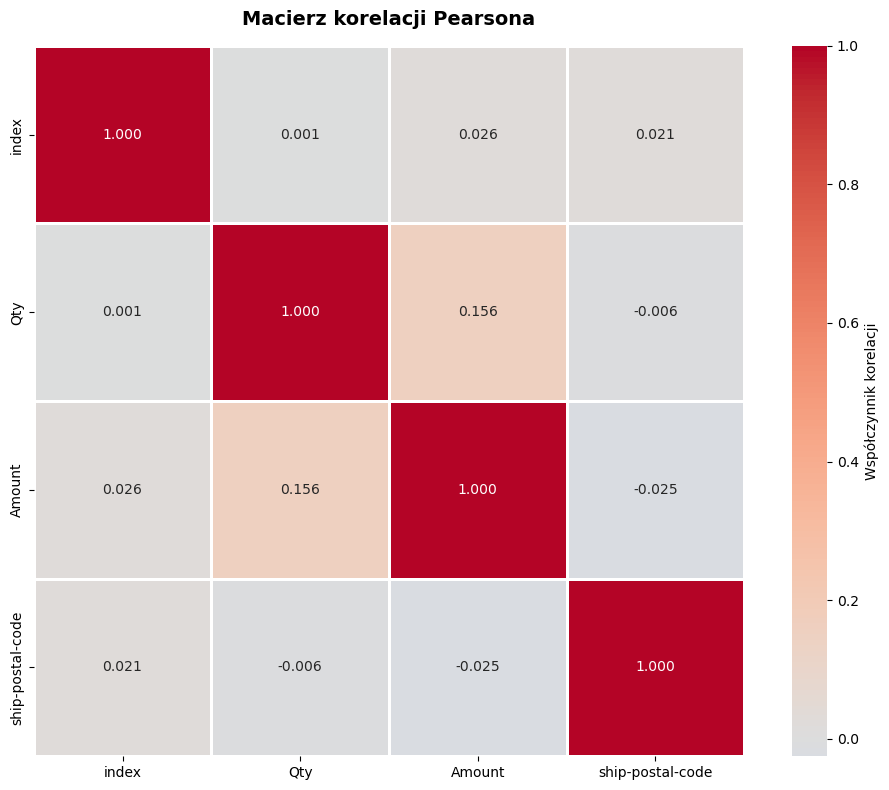



TOP 10 NAJSILNIEJSZYCH KORELACJI:
----------------------------------------------------------------------
Para zmiennych                                           Korelacja
----------------------------------------------------------------------
Qty                       ↔ Amount                      0.1564
index                     ↔ Amount                      0.0257
Amount                    ↔ ship-postal-code           -0.0253
index                     ↔ ship-postal-code            0.0213
Qty                       ↔ ship-postal-code           -0.0063
index                     ↔ Qty                         0.0007


INTERPRETACJA SIŁY KORELACJI:
  |r| < 0.3       → słaba korelacja
  0.3 ≤ |r| < 0.7 → umiarkowana korelacja
  |r| ≥ 0.7       → silna korelacja
PODSUMOWANIE PODSTAWOWYCH METRYK:
Liczba obiektów (po czyszczeniu): 19,379
Liczba klas: 10
Liczba atrybutów: 24
Brakujące dane: 0 (po usunięciu)
Usuniętych wierszy: 0 (0.00%)


In [9]:
print("ANALIZA KOMPLETNOŚCI DANYCH")

total_objects = len(df)
print(f"Liczba wierszy w zbiorze: {total_objects:,}")

target_column = 'Status'

if target_column in df.columns:
    num_classes = df[target_column].nunique()
    print(f"\nLICZBA KLAS (kolumna '{target_column}'):")
    print(f"Liczba unikalnych klas: {num_classes}")

    print(f"\nLICZBA OBIEKTÓW W KAŻDEJ KLASIE:")
    class_counts = df[target_column].value_counts().sort_index()
    print(class_counts)
    
    print("\nProcent w każdej klasie:")
    class_percent = (df[target_column].value_counts(normalize=True) * 100).sort_index()
    print(class_percent.round(2))
    
else:
    print(f"\nKolumna '{target_column}' nie istnieje w zbiorze danych")
    print("Dostępne kolumny kategoryczne do wyboru jako klasa:")
    print(df.select_dtypes(include='object').columns.tolist()[:10])

num_attributes = df.shape[1]
print(f"\nLICZBA ATRYBUTÓW/CECH:")
print(f"Liczba kolumn: {num_attributes}")

total_missing = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
missing_percent = (total_missing / total_cells) * 100

print(f"\nLICZBA BRAKUJĄCYCH DANYCH:")
print(f"Całkowita liczba brakujących wartości: {total_missing:,}")
print(f"Procent brakujących danych: {missing_percent:.2f}%")
print(f"Kompletnych komórek: {total_cells - total_missing:,} / {total_cells:,}")

print(f"\nBRAKUJĄCE WARTOŚCI PO KOLUMNACH:")
missing_by_column = df.isnull().sum()
missing_by_column = missing_by_column[missing_by_column > 0].sort_values(ascending=False)

if len(missing_by_column) > 0:
    print("\nKolumny z brakującymi wartościami:")
    for col, count in missing_by_column.items():
        percent = (count / len(df)) * 100
        print(f"  {col:30s}: {count:6,} ({percent:5.2f}%)")
else:
    print("Brak brakujących wartości w żadnej kolumnie")

print("USUNIĘCIE OBIEKTÓW Z BRAKUJĄCYMI DANYMI")

original_rows = len(df)
df_clean = df.dropna()

new_rows = len(df_clean)
removed_rows = original_rows - new_rows
removed_percent = (removed_rows / original_rows) * 100

print(f"\nLiczba wierszy przed usunięciem: {original_rows:,}")
print(f"Liczba wierszy po usunięciu: {new_rows:,}")
print(f"Usuniętych wierszy: {removed_rows:,} ({removed_percent:.2f}%)")

remaining_missing = df_clean.isnull().sum().sum()
print(f"\nWeryfikacja - pozostałe brakujące wartości: {remaining_missing}")

if remaining_missing == 0:
    print("Wszystkie brakujące wartości zostały usunięte.")
    df = df_clean

print("ŚREDNIE I ODCHYLENIA STANDARDOWE")

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 0:
    print(f"\nZmienne numeryczne ({len(numeric_cols)}):")
    print(numeric_cols)
    
    print("\nSTATYSTYKI OPISOWE:")
    print("-" * 80)
    
    stats_table = pd.DataFrame({
        'Średnia': df[numeric_cols].mean(),
        'Odchylenie std': df[numeric_cols].std(),
        'Mediana': df[numeric_cols].median(),
        'Min': df[numeric_cols].min(),
        'Max': df[numeric_cols].max()
    })
    print(stats_table)
else:
    print("\nBrak zmiennych numerycznych w zbiorze danych")

print("KORELACJE MIĘDZY ZMIENNYMI NUMERYCZNYMI")

if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()
    
    print("\nMACIERZ KORELACJI (Pearson):")
    print(correlation_matrix)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
                center=0, fmt='.3f', linewidths=1, square=True,
                cbar_kws={'label': 'Współczynnik korelacji'})
    plt.title('Macierz korelacji Pearsona', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()
    plt.show()
    
    print("\n\nTOP 10 NAJSILNIEJSZYCH KORELACJI:")
    print("-" * 70)
    
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            corr_value = correlation_matrix.iloc[i, j]
            corr_pairs.append((col1, col2, corr_value))
    
    corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)
    
    print(f"{'Para zmiennych':<55} {'Korelacja':>10}")
    print("-" * 70)
    for col1, col2, corr in corr_pairs_sorted[:10]:
        print(f"{col1:25s} ↔ {col2:25s}  {corr:7.4f}")
    
    print("\n\nINTERPRETACJA SIŁY KORELACJI:")
    print("  |r| < 0.3       → słaba korelacja")
    print("  0.3 ≤ |r| < 0.7 → umiarkowana korelacja")
    print("  |r| ≥ 0.7       → silna korelacja")
    
elif len(numeric_cols) == 1:
    print(f"\nTylko jedna zmienna numeryczna ({numeric_cols[0]})")
    print("Korelacja wymaga co najmniej dwóch zmiennych numerycznych")
else:
    print("\nBrak zmiennych numerycznych - nie można obliczyć korelacji")

print("PODSUMOWANIE PODSTAWOWYCH METRYK:")

print(f"Liczba obiektów (po czyszczeniu): {len(df):,}")
print(f"Liczba klas: {num_classes if target_column in df.columns else 'N/A'}")
print(f"Liczba atrybutów: {num_attributes}")
print(f"Brakujące dane: {df.isnull().sum().sum()} (po usunięciu)")
print(f"Usuniętych wierszy: {removed_rows:,} ({removed_percent:.2f}%)")